In [4]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

transfer_matrix = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0, 0.3, 0.7]],
                           dtype='float32')
start_matrix = np.array([[0.5, 0.3, 0.2]], dtype='float32')

value1 = []
value2 = []
value3 = []
for i in range(30):
    start_matrix = np.dot(start_matrix, transfer_matrix)
    value1.append(start_matrix[0][0])
    value2.append(start_matrix[0][1])
    value3.append(start_matrix[0][2])
print(start_matrix)

ImportError: No module named 'seaborn'

In [5]:
x = np.arange(30)
plt.plot(x,value1,label='cheerful')
plt.plot(x,value2,label='so-so')
plt.plot(x,value3,label='sad')
plt.legend()
plt.show()

NameError: name 'np' is not defined

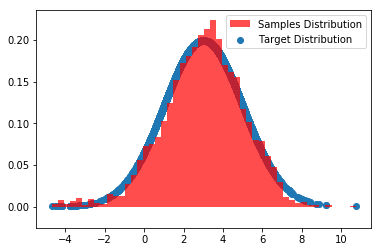

In [6]:
from scipy.stats import norm


def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y


T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1,
                       random_state=None)  #状态转移进行随机抽样
    alpha = min(
        1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))  #alpha值

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]

plt.scatter(pi, norm.pdf(pi, loc=3, scale=2), label='Target Distribution')
num_bins = 50
plt.hist(pi,
         num_bins,
         density=1,
         facecolor='red',
         alpha=0.7,
         label='Samples Distribution')
plt.legend()
plt.show()

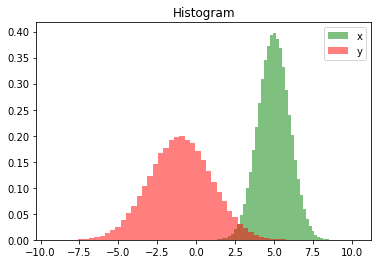

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)   #y给定得到x的采样
        y = p_ygivenx(x, m1, m2, s1, s2)   #x给定得到y的采样
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins,density=1, facecolor='green', alpha=0.5,label='x')
plt.hist(y_res, num_bins, density=1, facecolor='red', alpha=0.5,label='y')
plt.title('Histogram')
plt.legend()
plt.show()